# TMA4215 Numerical Mathematics Project #1

## Yawar Mahmood

Solving systems of equations is of great importance in today's technological society. Sometimes you don't have enough information about the variables you solve for, in other words, you have more variables than equations in your system. This is called underdetermined systems.

In this project, we will solve linear underdetermined systems of the form

$$ A\textbf{x} = \textbf{y} $$

where $ A \in \mathbb{R}^{mxn} $, $ \textbf{x} \in \mathbb{R}^n $, $ \textbf{y} \in \mathbb{R}^m $, where $ m < n $

We will use different methods to solve such systems of equations.

In Task 1 we use QR decomposition. 

In Task 2 we look at Tikhonov regularisations, where we solve for the least square solution. SVD decomposition is also used here.

In Task 3, we look at a more practical problem, namely Single Channel Source Separation.

In [1]:
"""""""""
Importing libraries.
"""""""""

import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.linalg as la
%matplotlib inline

Bringing code from project supplementary

In [2]:
def generate_A(m,n):
    """
    Generates m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: np.ndarray
    """

    cov_eigvecs = np.random.uniform(-1.0,1.0,(m,m))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = la.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(chol, A)
    return A

m = 2048
n = 8096
A = generate_A(m,n)

In [3]:
N = 100 # Number of test data we want to generate

# Generate solutions X columnwise, X[:,i] to access i-th vector
X = np.random.normal(0.0,1.0,(A.shape[1],N))

# Generate left hand sides Y columnwise Y[:,i] to access lhs
Y = np.dot(A,X)

# Doublecheck shapes
print(X.shape) # Expect (n,N)
print(Y.shape) # Expect (m,N)

(8096, 100)
(2048, 100)


# Task 1

## 1a)

Underdetermined linear systemes, where A is so-called wide, usually has no or infinitely many solutions. We will now present what the general case for no solutions and infinitely many solutions looks like. Then we will set m=2 and n=3, and give more rooted examples.

### i) the linear system does not have a solution

Choose all the entries of A $\in$ $\mathbb{R}^{mxn}$ to be zero, and choose $\textbf{y}$ such that it has no zero entries. This system has no solution.

Example:

$$
A = 
\begin{bmatrix}
    0 & 0 & 0 \\
    0 & 0 & 0 \\
\end{bmatrix}
$$
$$
x = 
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
\end{bmatrix}
$$
$$
y = 
\begin{bmatrix}
    1 \\
    1 \\
\end{bmatrix}
$$

### ii) the linear system has infinetaly many solutions

Choose all the entries of A $\in$ $\mathbb{R}^{mxn}$ and $\textbf{y}$ to be zero. This system has infinetaly many solutions.

Example:

$$
A = 
\begin{bmatrix}
    0 & 0 & 0 \\
    0 & 0 & 0 \\
\end{bmatrix}
$$
$$
x = 
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
\end{bmatrix}
$$
$$
y = 
\begin{bmatrix}
    0 \\
    0 \\
\end{bmatrix}
$$

## 1b)

Symmetric and positive semi-definite (PSD) matrices are in many ways easier to work with. We will show here that $A^TA$ and $AA^T$ are symmetric, as well as PSD.

Let A $\in$ $\mathbb{R}^{mxn}$, then $A^T \in \mathbb{R}^{nxm}$

Let the identity $(MN)^T = N^TM^T$ be known. 

We will first show that they are symmetrical. If a matrix M is symmetrical, then $M^T$ = M:

$$ (AA^T)^T = (A^T)^T A^T = AA^T $$

$$ (A^TA)^T = A^T(A^T)^T = A^TA $$

Which is what we wanted to show

Further, we want to show that they also are PSD. If a matrix M is PSD, then $ x^TMx \geq 0, \forall \textbf{x} \in \mathbb{R}^n $:

$$ x^TA^TAx = (Ax)^TAx = <Ax, Ax> = ||Ax||^2 \geq 0 $$

$$ x^TAA^Tx = (A^Tx)^TA^Tx = <A^Tx, A^Tx> = ||A^Tx||^2 \geq 0 $$

Which is what we wanted to show

Now we want to say something about the invertibility of these two matrices, given that A has full rank, that is, $rank(A) = m$. Further, we say that a matrix is invertable if it has full rank. In other words, it has linearly independent column vectors.

$ rank(A^TA) $:

$ A^TA \in \mathbb{R}^{nxn} $, this matrix has rank n

$ rank(AA^T) $:

$ AA^T \in \mathbb{R}^{mxm} $, this matrix has rank m

It is known that m < n, therefore $ AA^T $ is invertable, and $A^TA$ is not. 

## 1c) 

Which of the infinite number of solutions for x is the most appropriate to use?

One possibility is to choose x so that it has minimal norm. This is a constraint optimization problem, and we define $x_{min}$ as the minimal norm solution.

Let $ L(x, \lambda) = x^Tx + \lambda^T(Ax - y) = ||x||_2^2 + \lambda^TAx - \lambda^Ty $ be the Lagrange function for our minimal norm solution (L is given). We want to minimize L with respect to x and maximize L with respect to $\lambda$.

We are going to use this to show that $ x_{min} = A^T(AA^T)^{-1}y $

We start by computing both $\nabla_\lambda L$ and $ \nabla_x L $.

$\nabla_\lambda L$:

$$ \nabla_\lambda L(x, \lambda) = \nabla_\lambda \lambda^TAx - \nabla_\lambda \lambda^Ty $$

$$\nabla_\lambda \sum_j\lambda_j(a_{ij}x_j) - \nabla_\lambda \sum_j \lambda_jy $$

$$\sum_j(a_{ij}x_j) - y\sum_j 1$$

$$ Ax - y $$


$\nabla_x L$:

$$ \nabla_x L(x, \lambda) = \nabla_x ||x||_ 2^2 + \nabla_x \lambda^TAx $$

$$ \nabla_x \sum_j  \sqrt{(x_j^2)}^2 + \nabla_x \sum_j\lambda_j(a_{ij}x_j) $$

$$ \nabla_x \sum_j x_j^2 + \nabla_x \sum_j\lambda_j(a_{ij}x_j) $$

$$ 2x + \sum_j\lambda_j (a_{ij}) $$

$$ 2x + A^T\lambda $$

Setting both gradients to zero:
\begin{align} \label{eq1}\tag{1}
    Ax - y = 0
\end{align}

\begin{align} \label{eq2}\tag{2}
    2x+A^T\lambda = 0
\end{align}

Solving (\ref{eq1}) for x and (\ref{eq2}) for $\lambda$:

\begin{align} \label{eq3}\tag{3}
    x = A^{-1}y
\end{align}

\begin{align} \label{eq4}\tag{4}
    \lambda = -2(A^{T})^{-1}x
\end{align}

Insert (\ref{eq3}) in (\ref{eq4}):

\begin{align} \label{eq5}\tag{5}
    \lambda = -2(A^{T})^{-1} A^{-1}y
\end{align}

Substituting (\ref{eq5}) in (\ref{eq2}):
$$ 2x-2A^T(A^{T})^{-1} A^{-1}y = 0 $$
$$ x = A^T(A^{T})^{-1} A^{-1}y $$
\begin{align} \label{eq6}\tag{6}
    x = A^T(AA^T)^{-1}y
\end{align}

Which is what we wanted to show

## 1d)

Let

\begin{align} \label{eq7}\tag{7}
     A^T = QR 
\end{align}

\begin{align} \label{eq8}\tag{8}
     A = R^TQ^T 
\end{align}

where $Q \in \mathbb{R}^{nxm}$ is an orthogonal matrix and $ R \in \mathbb{R}^{mxm} $ is an upper triangular matrix. 

Insert (\ref{eq7}) and (\ref{eq8}) in (6):

$$ x = QR(R^TQ^TQR)^{-1}y $$

Using $ Q^TQ = I $:

$$ x = QR(R^TR)^{-1}y $$

Using that $(AB)^{-1} = B^{-1}A^{-1}$ 

and 

if $(AB)^{-1}$ exists, implies that $A^{-1}$ and $B^{-1}$ exists

$$ x = QRR^{-1}(R^T)^{-1}y $$
\begin{align} \label{eq9}\tag{9}
     x = Q(R^T)^{-1} y
\end{align}

Which is what we wanted to show

In [76]:
def QR_decomposition(A):
    """
    Performs QR decomposition
    Input:
        A: np.array, which we want to QR decompose
    output:
        Q: np.array, orthogonal matrix
        R: np.array, upper triangular matrix
    """
    Q = np.copy(A)
    num_col = np.shape(Q)[-1]
    for i in range(num_col):
        for j in range(i):
            Q[:, i] -= np.dot(Q[:, j], Q[:, i]) * Q[:, j]
        Q[:, i] /= np.linalg.norm(Q[:, i], 2)
    R = np.matmul(Q.T, A)
    return Q, R

## 1e)

In practical applications, it is difficult and/or timeconsuming to calculate the inverse of a matrix. As we can see from (9), there is an inverse in the equation. We can find a work around this issue

Let $ z = (R^T)^{-1}y $

Then:
\begin{align} \label{eq10}\tag{10}
     R^Tz = y
\end{align}

Then (9) can be written as: 

\begin{align} \label{eq11}\tag{11}
     x = Qz
\end{align}

Instead of solving one equation with an inverse in (9), we can first solve (\ref{eq10}) for z. (\ref{eq10}) is particularly easy to solve, since $R^T$ is a lower triangular matrix. We use forward substitution to solve for z. z can then be used to solve for x in (\ref{eq11})

In [5]:
def forward_substitution(R, y):
    """
    Solves a system with an lower triangular matrix 
    Input:
        R: np.array, upper triangular matrix
        y: np.array, righthand side of equation
    output:
        z: np.array, solution of lower triangular matrix system
    """
    R_T = R.T
    rows = R.shape[0]
    z = np.zeros_like(y, dtype=np.double)
    z[0] = y[0] / R_T[0,0]
    for i in range(1, rows):
        z[i] = (y[i] - np.dot(R_T[i, :i], z[:i])) / R_T[i,i]
    return z

def solve_x_QR(Q, R, y):
    """
    Solves a system with QR decomposition
    Input:
        Q: np.array, orthogonal matrix
        R: np.array, upper triangular matrix
        y: np.array, righthand side of equation
    output:
        x: np.array, solution 
    """
    z = forward_substitution(R, y)
    return np.dot(Q, z)

## 1f)

Let:

\begin{align} \label{eq12}\tag{12}
     AA^Tz = y
\end{align}

\begin{align} \label{eq13}\tag{13}
     x_{min} = A^Tz
\end{align}

We are now going to test our method numerically, and compare it against numpy implementations

The comparison is based on:
- Computation speed
- Error

We denote numpy implementations by i) and our method by ii)

### Computation speed

#### i)

In [63]:
%%timeit -r 5
np.matmul(A, A.T)

172 ms ± 8.97 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [64]:
AAT = np.matmul(A, A.T)

In [10]:
%%timeit -r 5
for y in Y.T:
    z = la.solve(AAT, y)
    np.matmul(A.T, z)

13.1 s ± 103 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


#### ii)

In [77]:
%%timeit -r 5
QR_decomposition(A.T)

30.5 s ± 1.15 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [70]:
Q, R = QR_decomposition(A.T)

In [17]:
%%timeit -r 5
for y in Y.T:
    solve_x_QR(Q, R, y)

1.52 s ± 57.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


comment on computation time

### Error

#### i)

In [72]:
error_QR_numpy = np.zeros(len(Y.T))
AAT = np.matmul(A, A.T)
for i in range(len(Y.T)):
    z = la.solve(AAT, Y[:, i])
    x_min = np.matmul(A.T, z)
    error_QR_numpy[i] = np.linalg.norm(x_min - X[:, i] , 2)

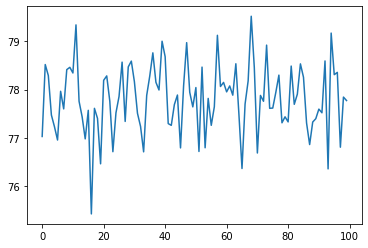

In [73]:
plt.plot(error_QR_numpy)
plt.show()

#### ii)

In [74]:
error_QR_implementation = np.zeros(len(Y.T))
for i in range(len(Y.T)):
    x_min = solve_x_QR(Q, R, Y[:, i])
    error_QR_implementation[i] = np.linalg.norm(x_min - X[:, i] , 2)

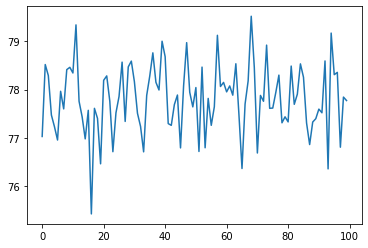

In [75]:
plt.plot(error_QR_implementation)
plt.show()

### Difference between error

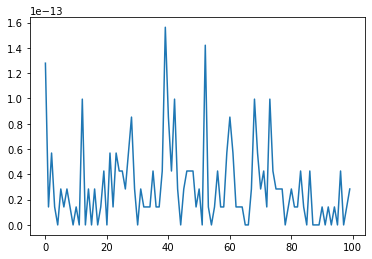

In [25]:
plt.plot(np.abs(error_QR_numpy - error_QR_implementation))
plt.show()

# Task 2

### 2a)

Let $ T(x) = ||Ax - y||^2 + \mu||x||^2 $

A solution of the Tikhonov regularisation satisfies $\nabla_x T(x) = 0$

$ \nabla_x T(x) $:

$$ \nabla_x T(x) = \nabla_x ||Ax - y||^2 + \nabla_x \mu||x||^2$$


$$ \nabla_x \sum_{i}(\sum_{j} a_{ij}x_j - y_i )^2 + \nabla_x \mu \sum_{i=1}^n x_i^2 $$

$$ \frac{\partial}{\partial x_r} \sum_{i}(\sum_{j} a_{ij}x_j - y_i )^2 + \frac{\partial}{\partial x_r} \mu \sum_{i=1}^n x_i^2 $$

$$ 2\sum_i a_{ir} \sum_j (a_{ij}x_j - y_i) + 2\mu x $$

$$ 2A^T(Ax - y) + 2\mu x $$

$$ 2[A^T(Ax - y) + \mu x] $$

$ \nabla_x T(x) = 0$:

$$ [A^T(Ax - y) + \mu x] = 0 $$

$$ A^TAx - A^Ty + \mu x = 0 $$

\begin{align} \label{eq14}\tag{14}
     [A^TA + \mu I]x = A^Ty
\end{align}

Which is what we wanted to show

Further, we want to show that $ [A^TA + \mu I] $ is symmetric positive semi-definite.

Start by showing that $ [A^TA + \mu I] $ is symmetric:

$$ [A^TA + \mu I]^T = (A^TA)^T + (\mu I)^T = A^T(A^T)^T + I^T\mu^T = A^TA + \mu I $$

Need to show that $ x^TA^TAx \geq 0 $ and $ \mu I \geq 0 $

$ \mu I \geq 0 $ as $ \mu > 0 $

Further, acknowledge that:

$$ x^TA^TAx = (Ax)^TAx = || Ax ||^2 \geq 0 $$

Hence, $ [A^TA + \mu I] $ is symmetric positive semi-definite

### 2b)

Let $ A = U\Sigma V^T $, which implies $ A^T = V\Sigma^TU^T $

Inserting this into (14):
$$ [ V\Sigma^TU^TU\Sigma V^T + \mu I ]x_r = V\Sigma^TU^Ty $$

$ U^TU = I_m $:

$$ [ V\Sigma^T\Sigma V^T + \mu I ]x_r = V\Sigma^TU^Ty $$

Further, $ \Sigma^T\Sigma = \Sigma^2 = \Lambda $, and $ I = VV^T $:

$$ [ V\Lambda V^T + \mu VV^T ]x_r = V\Sigma^TU^Ty $$

$$ V(\Lambda + \mu I)V^Tx = V\Sigma^TU^Ty $$

$$ V(\Lambda + \mu I)V^Tx = \Sigma^TU^Ty $$

$$ x = V(\Lambda + \mu I)^{-1}\Sigma^TU^Ty $$

Notice that $ (\Lambda + \mu I)^{-1}\Sigma^T $ is diagonal, and we call this matrix D. Then: 

$$ x = VDU^Ty $$

Which is what we wanted to show

### 2c)

In [40]:
def Tikhonov_solveSVD(U,S,Vt,mu):
    """
    Assume that Vt is not full 
    ---------------------------------------------------
    Computes x based on A and mu using the SVD approach
    Input:
        U: np.array, ortogonal matrix
        S: np.array, singular matrix
        Vt: np.array, ortogonal matrix
        mu: float, Tikhonov regularisation parameter
    output:
        x: np.array, solution
    """
    D = S / (S**2 + mu)
    VD = Vt.T * D   
    return np.matmul(VD, U.T)

### 2d)

We are now going to test our method numerically, and compare it against numpy implementations

The comparison is based on:
- Computation speed
- Error

We denote our method by i) and the numpy implementation by ii)

### Computation speed

#### i)

In [41]:
mu_arr = np.logspace(6,-6,num = 100) 

In [46]:
%%timeit -r 5
U, S, Vt = np.linalg.svd(A, full_matrices=False)

13.8 s ± 510 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [54]:
%%timeit -r 5
for mu in mu_arr:
    svd = Tikhonov_solveSVD(U, S, Vt, mu)
    np.matmul(svd, Y[:, 0])

34.5 s ± 433 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


#### ii)

In [47]:
%%timeit -r 5
ATA = np.matmul(A.T, A)
ATy = np.matmul(A.T, Y)

646 ms ± 8.72 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [48]:
ATA = np.matmul(A.T, A)
ATy = np.matmul(A.T, Y)
selected_mu_arr = np.logspace(6,-6,num = 10) 
I = np.identity(len(ATA))

In [55]:
%%timeit -r 5
for mu in selected_mu_arr:
    np.linalg.solve(ATA + mu*I, ATy[:, 0])

19.8 s ± 663 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


### Error

#### i)

In [52]:
error_tikhonov = []
for mu in mu_arr:
    svd = Tikhonov_solveSVD(U, S, Vt, mu)
    x_min = np.matmul(svd, Y[:, 0])
    error_tikhonov.append(np.linalg.norm(x_min - X[:, 0], 2))

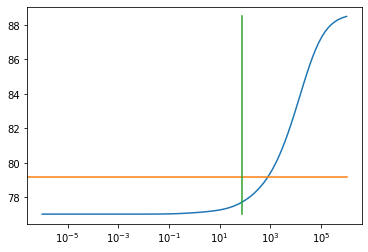

In [105]:
error_tikhonov = np.array(error_tikhonov)
plt.plot(mu_arr, error_tikhonov)
error_tikhonov_mean = np.sum(error_tikhonov)/len(error_tikhonov)
error_tikhonov_min = error_tikhonov[np.argmin(error_tikhonov)]
plt.plot([0, 10**6], [error_tikhonov_mean, error_tikhonov_mean])
plt.plot([error_tikhonov_min, error_tikhonov_min], [min(error_tikhonov), max(error_tikhonov)])
plt.xscale('log')
plt.show()

In [60]:
error_numpy = []
for mu in selected_mu_arr:
    x_min = np.linalg.solve(ATA + mu*I, ATy[:, 0])
    error_numpy.append(np.linalg.norm(x_min - X[:, 0], 2))

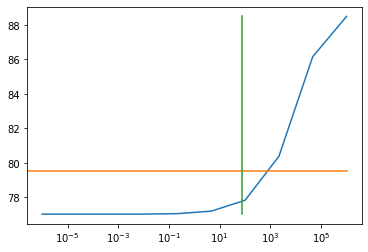

In [106]:
error_numpy = np.array(error_numpy)
plt.plot(selected_mu_arr, error_numpy)
error_numpy_mean = np.sum(error_numpy)/len(error_numpy)
error_numpy_min = error_numpy[np.argmin(error_numpy)]
plt.plot([0, 10**6], [error_numpy_mean, error_numpy_mean])
plt.plot([error_numpy_min, error_numpy_min], [min(error_numpy), max(error_numpy)])
plt.xscale('log')
plt.show()

## Task 3

### a)

Let $ B = I - WW^T $

Assume B to be a projection matrix. Then $B^2 = B$

$$ B^2 = (I - WW^T)^2 $$

$$ I^2 - 2IWW^T + (WW^T)^2 $$

$$ I^2 - 2IWW^T + WW^TWW^T $$

Since W is a matrix with pairwise orthogonal columns, $W^TW = I$:

$$ I^2 - 2IWW^T + WW^T $$

$$ I^2 - WW^T = B $$

We want to show that B is symmetric:

$$ B^T = (I - WW^T)^T $$ 
$$I^T - (WW^T)^T$$
$$I - WW^T = B $$

B is positive definite, $ x^TBx \geq 0 $:

$$ x^TBx = x^TB^2x $$
$$x^TB^TBx $$
$$<Bx, Bx> $$
$$|| Bx ||^2 \geq 0 $$

### b)

### i)

Let $ L(x, \lambda) = \frac{1}{2}x^TBx + \lambda^T(Ax - y) $

Computing $\nabla_x L$ and $\nabla_\lambda L$:

$\nabla_\lambda L$:

$$ \nabla_\lambda L(x, \lambda) = \nabla_\lambda \lambda^TAx - \nabla_\lambda \lambda^Ty $$

$$\nabla_\lambda \sum_j\lambda_j(a_{ij}x_j) - \nabla_\lambda \sum_j \lambda_jy $$

$$\sum_j(a_{ij}x_j) - y\sum_j 1$$

$$ Ax - y $$

$ \nabla_x L $

$$ \nabla_x(\frac{1}{2}x^TBx) + \nabla_x(\lambda^TAx) $$


$$\nabla_x(\frac{1}{2}x^TBx) + \nabla_x(\lambda^TAx) $$

$$ \nabla_x \frac{1}{2}\sum_i x_i \sum_j b_{ij}x_j + \nabla_x \sum_j\lambda_j(a_{ij}x_j) $$

$$ \frac{\partial}{\partial x_r} \frac{1}{2}\sum_i x_i \sum_j b_{ij}x_j + \sum_j\lambda_j(a_{ij}) $$

$$ \frac{\partial}{\partial x_r} \frac{1}{2}\sum_i x_i \sum_j b_{ij}x_j + \sum_j\lambda_j(a_{ij}) $$

$$ x_rb_{rr} + \frac{1}{2} \sum_{j \neq r} b_{rj}x_j + \frac{1}{2}\sum_{i \neq r} x_i  b_{ir} + \sum_j\lambda_j(a_{ij}) $$

$$ \frac{1}{2}B^Tx + \frac{1}{2}Bx + \lambda A^T $$

Set $ \nabla_\lambda L = 0$:

$$ Ax = y $$

Set $ \nabla_x L = 0$:

$$ \frac{1}{2}B^Tx + \frac{1}{2}Bx + \lambda A^T = 0 $$

This can be represented as a matrix:

$$
\begin{bmatrix}
    \frac{1}{2}B^T + \frac{1}{2}B & A^T \\
    A & 0 \\
\end{bmatrix}
\begin{bmatrix}
    x \\
    \lambda \\
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    y \\
\end{bmatrix}
$$

Which is what we wanted to show

We know that $ \frac{1}{2}B^T + \frac{1}{2}B = B $

Then the matrix is written as:

$$
\begin{bmatrix}
    \begin{bmatrix}
    B_0 & 0 \\
    0 & B_1 
\end{bmatrix} & A^T \\
    A & 0 \\
\end{bmatrix}
\begin{bmatrix}
    x \\
    \lambda \\
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    y \\
\end{bmatrix}
$$

The same can be done for A, $A^T$ and x:

$$
\begin{bmatrix}
    \begin{bmatrix}
    B_0 & 0 \\
    0 & B_1 
\end{bmatrix} & \begin{bmatrix}
    I \\
    I \\
\end{bmatrix} \\
    \begin{bmatrix}
    I & I \\
\end{bmatrix} & 0 \\
\end{bmatrix}
\begin{bmatrix}
    \begin{bmatrix}
    u \\
    v \\
\end{bmatrix} \\
    \lambda \\
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    y \\
\end{bmatrix}
$$

Now, $B_0 = I - W_0W_0^T$ and $ B_1 = I - W_1W_1^T $

Then the matrix can be written as:

$$
\begin{bmatrix}
    I - W_0W_0^T & 0 & I \\
    0 & I - W_1W_1^T & I \\
    I & I & 0 \\
\end{bmatrix}
\begin{bmatrix}
    u \\
    v \\
    \lambda \\
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0 \\
    y \\
\end{bmatrix}
$$

Which is what we wanted to show

### ii)

We want to write this system in the form $Cu = d$

From the matrix above, we get the following equations:

$$ Iu + Iv = y $$
$$ (I - W_0W_0^T)u + I\lambda = 0 $$
$$ (I - W_0W_0^T)v + I\lambda = 0 $$

We use these to eliminate $\lambda$ and v by setting:
$$ v = y - u $$
$$ (I - W_1W_1^T)v - (I - W_0W_0^T)u = 0 $$

Putting these together gives:

$$ Iy - W_1W_1^Ty = (I - W_1W_1^T)u + (I - W_0W_0^T)u $$

Let $ C = (I - W_1W_1^T) + (I - W_0W_0^T) $, d = $ Iy - W_1W_1^Ty $, then:
$$ Cu = d $$

To solve for v, we use the equation:
$$ v = y - u $$

### iii)

In [86]:
def minimal_norm_solve(W_0, W_1, y):
    """
    Computes x based on A and mu using the SVD approach
    Input:
        W_0: np.array, basis vectors for 0
        W_1: np.array, basis vectors for 1
        y: np.array, vector containing 0 and 1
    output:
        u: np.array, channel with 0
        v: np.array, channel with 1
    """
    I = np.identity(len(W_0))
    W_1 = np.matmul(W_1, W_1.T)
    W_0 = np.matmul(W_0, W_0.T)
    C = (I - W_1) + (I - W_0)
    d = np.matmul((I - W_1), y)
    u = np.linalg.solve(C, d)
    v = y - u
    return u, v

### d)

In [87]:
W0 = np.load('Data/W0.npy')
W1 = np.load('Data/W1.npy')
Mixes = np.load('Data/mixed.npy')

In [84]:
%%timeit -r 5
for elem in Mixes.T:
    minimal_norm_solve(W0, W1, elem)

2.29 s ± 53.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


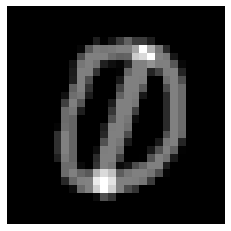

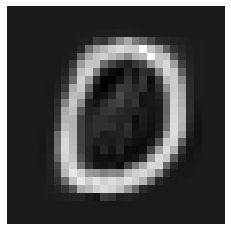

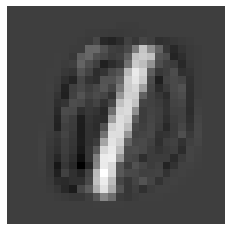

In [104]:
Mixes_T = Mixes.T

i = 1

u, v = minimal_norm_solve(W0, W1, Mixes_T[i])

plt.imshow(Mixes[:,i].reshape((28,28)), cmap = 'gray')
plt.axis('off') # Removes the x and y axis to plot only the image
plt.show()

plt.imshow(u.reshape((28,28)), cmap = 'gray')
plt.axis('off') # Removes the x and y axis to plot only the image
plt.show()

plt.imshow(v.reshape((28,28)), cmap = 'gray')
plt.axis('off') # Removes the x and y axis to plot only the image
plt.show()

\textbb{fdsaas}

Klarte å gjenskape bildene ganske fint, men x-en som minimerer normen er kanskje ikke den beste måten å separere bildene på. 